<a href="https://colab.research.google.com/github/cheung0/Predicting-Air-Quality/blob/main/Decision_Tree_California_Air_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preprocessing**  

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
df = pd.read_csv('/content/California Air Quality.csv')
df = pd.get_dummies(df, columns=['DAY_OF_WEEK'])
y = df.DAILY_AQI_VALUE
df_features = ['Daily Mean PM2.5 Concentration', 'DAY_OF_WEEK_Friday',
       'DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday',
       'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday']
X = df[df_features]

**Decision Tree** 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [95]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

**Solving Underfitting and Overfitting**

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

# Function to get MAE, MSE, and R2 score
def get_metrics(max_leaf_nodes, train_X, val_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(test_y, preds_val)
    mse = mean_squared_error(test_y, preds_val)
    r2 = r2_score(test_y, preds_val)
    return mae, mse, r2

# Compare metrics with differing values of max_leaf_nodes
for max_leaf_nodes in [2, 3, 4, 5, 10, 50, 100, 500]:
    mae, mse, r2 = get_metrics(max_leaf_nodes, train_X, test_X, train_y, test_y)
    print("Max leaf nodes: %d \t MAE: %.4f \t MSE: %.5f \t R2 Score: %.4f" % (max_leaf_nodes, mae, mse, r2))


Max leaf nodes: 2 	 MAE: 10.4299 	 MSE: 252.53928 	 R2 Score: 0.5561
Max leaf nodes: 3 	 MAE: 9.0937 	 MSE: 149.32839 	 R2 Score: 0.7375
Max leaf nodes: 4 	 MAE: 6.3251 	 MSE: 95.78952 	 R2 Score: 0.8316
Max leaf nodes: 5 	 MAE: 5.4091 	 MSE: 73.62301 	 R2 Score: 0.8706
Max leaf nodes: 10 	 MAE: 3.0089 	 MSE: 21.24541 	 R2 Score: 0.9627
Max leaf nodes: 50 	 MAE: 0.6319 	 MSE: 0.86017 	 R2 Score: 0.9985
Max leaf nodes: 100 	 MAE: 0.1219 	 MSE: 0.17353 	 R2 Score: 0.9997
Max leaf nodes: 500 	 MAE: 0.0037 	 MSE: 0.07786 	 R2 Score: 0.9999


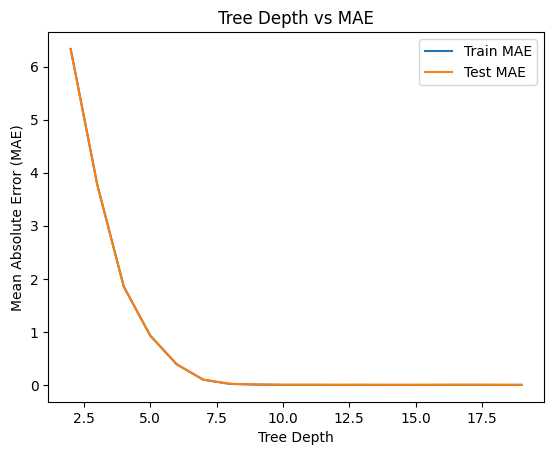

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Initialize empty lists for tree depths and MAE values
tree_depths = []
train_mae_values = []
test_mae_values = []

# Iterate over different tree depths
for depth in range(2, 20):
    # Create and fit the Decision Tree model
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(train_X, train_y)
    
    # Predict on the train set
    train_predictions = model.predict(train_X)
    # Calculate the MAE on the train set
    train_mae = mean_absolute_error(train_y, train_predictions)
    
    # Predict on the test set
    test_predictions = model.predict(test_X)
    # Calculate the MAE on the test set
    test_mae = mean_absolute_error(test_y, test_predictions)
    
    # Append the tree depth and MAE to the lists
    tree_depths.append(depth)
    train_mae_values.append(train_mae)
    test_mae_values.append(test_mae)

# Plot the tree depth vs MAE for both train and test sets using Seaborn
sns.lineplot(x=tree_depths, y=train_mae_values, label='Train MAE')
sns.lineplot(x=tree_depths, y=test_mae_values, label='Test MAE')
plt.xlabel('Tree Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Tree Depth vs MAE')
plt.legend()
plt.show()

**Building Machine Learning Model**

In [98]:
# Create and fit the DecisionTreeRegressor model
# test different leaf nodes
max_leaf_nodes = 500
model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
model.fit(train_X, train_y)

DecisionTreeRegressor(max_leaf_nodes=500)

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the train set
train_predictions = model.predict(train_X)

# Predict on the test set
test_predictions = model.predict(test_X)

# Calculate the Mean Absolute Error (MAE) on train and test sets
train_mae = mean_absolute_error(train_y, train_predictions)
test_mae = mean_absolute_error(test_y, test_predictions)

# Calculate the Mean Squared Error (MSE) on train and test sets
train_mse = mean_squared_error(train_y, train_predictions)
test_mse = mean_squared_error(test_y, test_predictions)

# Calculate the Root Mean Squared Error (RMSE) on train and test sets
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate the R-squared (R2) score on train and test sets
train_r2 = r2_score(train_y, train_predictions)
test_r2 = r2_score(test_y, test_predictions)

# Print the evaluation metrics
print("Train Set - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(train_mae, train_mse, train_rmse, train_r2))
print("Test Set - MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R2 Score: {:.2f}".format(test_mae, test_mse, test_rmse, test_r2))

Train Set - MAE: 0.00, MSE: 0.00, RMSE: 0.00, R2 Score: 1.00
Test Set - MAE: 0.00, MSE: 0.07, RMSE: 0.27, R2 Score: 1.00


Mean Absolute Error: 0.0034041224234853218


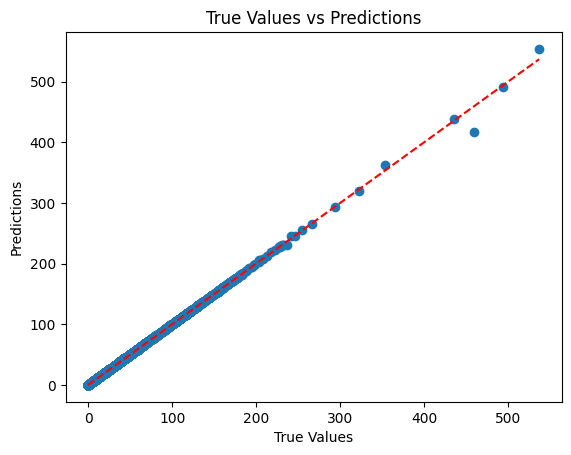

In [100]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Get predicted prices on validation data
val_predictions = model.predict(test_X)

# Calculate mean absolute error
mae = mean_absolute_error(test_y, val_predictions)
print("Mean Absolute Error:", mae)

# Plot predicted vs true values
plt.scatter(test_y, val_predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

**Make new predictions**

In [101]:
sample_input = pd.DataFrame({'Daily Mean PM2.5 Concentration': [5.1],
                             'DAY_OF_WEEK_Friday': [0],
                             'DAY_OF_WEEK_Monday': [0],
                             'DAY_OF_WEEK_Saturday': [0],
                             'DAY_OF_WEEK_Sunday': [1],
                             'DAY_OF_WEEK_Thursday': [0],
                             'DAY_OF_WEEK_Tuesday': [0],
                             'DAY_OF_WEEK_Wednesday': [0]})

# Extract the day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week = days_of_week[sample_input[['DAY_OF_WEEK_Monday', 'DAY_OF_WEEK_Tuesday', 'DAY_OF_WEEK_Wednesday', 'DAY_OF_WEEK_Thursday', 'DAY_OF_WEEK_Friday', 'DAY_OF_WEEK_Saturday', 'DAY_OF_WEEK_Sunday']].values.argmax()]

# Extract the daily PM2.5 concentration
pm25_concentration = sample_input['Daily Mean PM2.5 Concentration'].values[0]

# Print the day of the week and the daily PM2.5 concentration
print("Day of the Week:", day_of_week)
print("PM2.5 Concentration:", pm25_concentration)


# Predict the AQI values for the sample input data
predicted = model.predict(sample_input)
# rounded_predicted = np.round(predicted)

# Denormalize the predicted AQI values
#predicted_denormalized = scaler.inverse_transform(predicted)

# Print the denormalized predicted AQI values
print()
print('Predicted AQI:', predicted[0])

Day of the Week: Sunday
PM2.5 Concentration: 5.1

Predicted AQI: 21.0


**Tree Ensemble Models**

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(test_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error: 0.004849555372995069


In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)